In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# define constants
G       = 6.67259e-8    # cgs
sep     = 1.496e+13   # 1 AU --> cm
M       = 1.989e+33     # 1 solar mass --> g
max_phi = 5e13

# calculate distance from star A and star B, in cm
def rA(x, y):
    return (np.sqrt((x+.5)**2+y**2))*sep
def rB(x,y):
    return (np.sqrt((x-.5)**2+y**2))*sep
# calculate gravitational potential
def phi(r):
    return G*M / r

# define our data arrays
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)

X, Y = np.meshgrid(x,y)

# calculate distances from each star
rA_vals = rA(X,Y)
rB_vals = rB(X,Y)

# Calculate gravitational potential for all grid points
data = phi(rA_vals) +phi(rB_vals)
# Apply the max_phi limit
data = np.where(data > max_phi, max_phi, data)

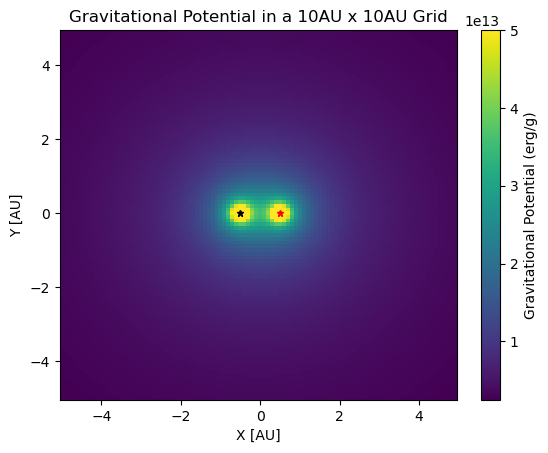

In [2]:
# Plot the result using pcolormesh
plt.pcolormesh(x, y, data, shading='auto', cmap='viridis', vmax=max_phi) 
plt.plot(0.5, 0, marker='*', ms=5, color='red')
plt.plot(-0.5, 0, marker='*', ms=5, color='black')
plt.colorbar(label='Gravitational Potential (erg/g)')
plt.xlabel('X [AU]')
plt.ylabel('Y [AU]')
plt.title('Gravitational Potential in a 10AU x 10AU Grid')

plt.show()

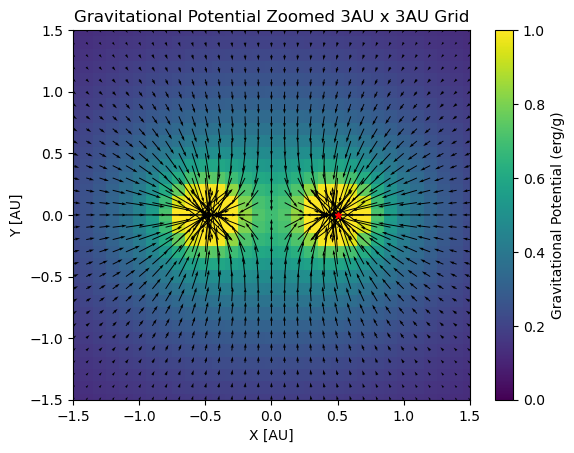

In [3]:
# calculate the gradient; stores as (grad_y, grad_x) shape (2,100,100)
dphi = np.gradient(data)

# Plot the result using pcolormesh
plt.pcolormesh(x, y, data, shading='auto', cmap='viridis', vmax=max_phi)  # Transpose data for correct orientation
plt.quiver(X,Y,dphi[1], dphi[0])
plt.plot(0.5, 0, marker='*', ms=5, color='red')
plt.plot(-0.5, 0, marker='*', ms=5, color='black')
plt.colorbar(label='Gravitational Potential (erg/g)')
plt.xlabel('X [AU]')
plt.ylabel('Y [AU]')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.title('Gravitational Potential Zoomed 3AU x 3AU Grid')

plt.show()